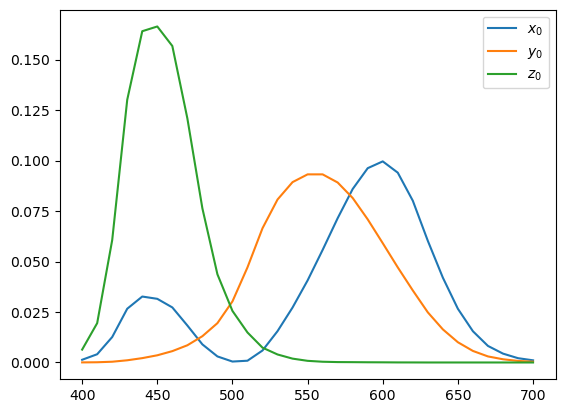

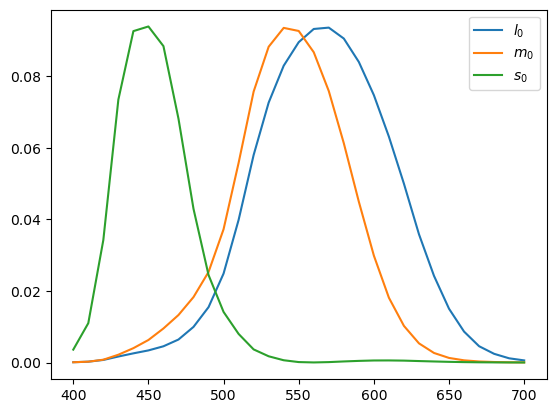

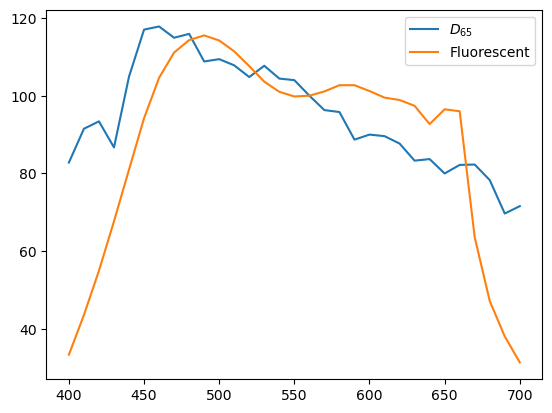

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]

x = data['x']
y = data['y']
z = data['z']
illum1 = data['illum1']
illum2 = data['illum2']

wavelength = np.arange(400, 710, 10)
plt.plot(wavelength, x.flatten())
plt.plot(wavelength, y.flatten())
plt.plot(wavelength, z.flatten())
plt.legend([r'$x_0$', r'$y_0$', r'$z_0$'])
plt.show()

A_inv = np.array([[0.2430, 0.8560, -0.0440], [-0.3910, 1.1650, 0.0870], [0.0100, -0.0080, 0.5630]])
temp = np.array([x.flatten(), y.flatten(), z.flatten()])
lms = np.dot(A_inv, temp)
l, m, s = lms[0, :], lms[1, :], lms[2, :]
plt.plot(wavelength, l)
plt.plot(wavelength, m)
plt.plot(wavelength, s)
plt.legend([r'$l_0$', r'$m_0$', r'$s_0$'])
plt.show()

plt.plot(wavelength, illum1.flatten())
plt.plot(wavelength, illum2.flatten())
plt.legend([r'$D_{65}$', 'Fluorescent'])
plt.show()

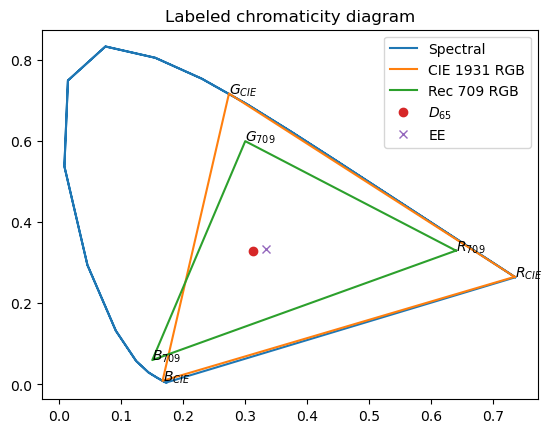

In [36]:
# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]

x = data['x']
y = data['y']
z = data['z']
illum1 = data['illum1']
illum2 = data['illum2']
X = np.zeros((1, np.size(x)))
Y = np.zeros((1, np.size(y)))

wavelength = np.arange(400, 710, 10)

for i in range(np.size(x)):
    X[0, i] = x[0, i] / (x[0, i] + y[0, i] + z[0, i])
    Y[0, i] = y[0, i] / (x[0, i] + y[0, i] + z[0, i])

CIE_1931 = np.array([[0.73467, 0.26533, 0.0],
                     [0.27376, 0.71741, 0.00883], 
                     [0.16658, 0.00886, 0.82456]])

Rec_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

D65_white_point = np.array([0.3127, 0.3290, 0.3583])

EE_white_point = np.array([0.3333, 0.3333, 0.3333])


plt.plot(np.append(X, X[0]).flatten(), np.append(Y, Y[0]).flatten(), '-', label = "Spectral")
plt.plot(np.append(CIE_1931[:, 0], CIE_1931[0, 0]), np.append(CIE_1931[:, 1], CIE_1931[0, 1]), '-', label = "CIE 1931 RGB")
plt.plot(np.append(Rec_709[:, 0], Rec_709[0, 0]), np.append(Rec_709[:, 1], Rec_709[0, 1]), '-', label = "Rec 709 RGB ")
plt.plot(D65_white_point[0], D65_white_point[1], 'o', label = r'$D_{65}$')
plt.plot(EE_white_point[0], EE_white_point[1], 'x', label = r'EE')

labels_cie = [r'$R_{CIE}$', r'$G_{CIE}$', r'$B_{CIE}$']
labels_709 = [r'$R_{709}$', r'$G_{709}$', r'$B_{709}$']

for i in range(3):
    plt.text(CIE_1931[i, 0], CIE_1931[i, 1], labels_cie[i])
    plt.text(Rec_709[i, 0], Rec_709[i, 1], labels_709[i])

# plt.text(D65_white_point[0]-0.04, D65_white_point[1]-0.03, r'$D_{65}$')
# plt.text(EE_white_point[0], EE_white_point[1]+0.02, r'EE')
plt.legend()
plt.title(r"Labeled chromaticity diagram")
plt.show()

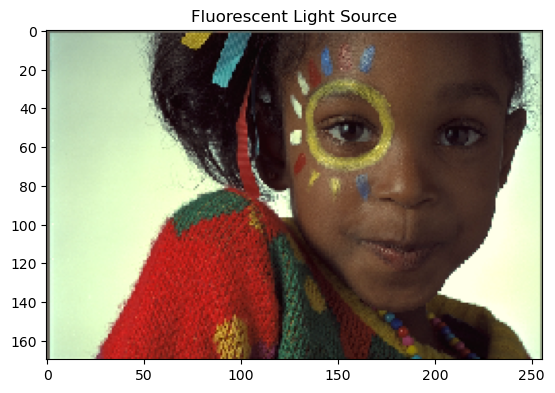

In [38]:
# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]
reflect = np.load('reflect.npy', allow_pickle=True)[()]

x = data['x']
y = data['y']
z = data['z']
illum1 = data['illum1']
illum2 = data['illum2']
R = reflect['R']
I = np.zeros(R.shape)
xyz = np.array([x, y, z])

for i in range(R.shape[2]):
    I[:, :, i] = np.dot(R[:, :, i], illum2[0, i])


XYZ = np.zeros((R.shape[0], R.shape[1], 3))

for i in range(XYZ.shape[2]):
    # Iterate over the wavelengths
    for j in range(R.shape[2]):
        XYZ[:, :, i] += xyz[i][0, j] * I[:, :, j]

Rec_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

D65_white_point = np.array([0.3127, 0.3290, 0.3583])

temp = np.array([D65_white_point[0]/D65_white_point[1], 1, D65_white_point[2]/D65_white_point[1]])
scale_coeff = np.dot(np.linalg.inv(Rec_709.T), temp)
M = np.dot(Rec_709.T, np.diag(scale_coeff))
# print('M = ', M)

RGB = np.zeros(XYZ.shape)
# Take each pixel in XYZ array to RGB coordinates
for i in range(XYZ.shape[0]):
    for j in range(XYZ.shape[1]):
        RGB[i, j] += np.dot(np.linalg.inv(M), XYZ[i, j]).flatten()
        for k in range(XYZ.shape[2]):
            if RGB[i, j, k] > 1:
                RGB[i, j, k] = 1
            elif RGB[i, j, k] < 0:
                RGB[i, j, k] = 0

gamma = 2.2            
RGB = RGB**(1/gamma)

plt.figure()
plt.title('Fluorescent Light Source')
plt.imshow(RGB)
plt.show()

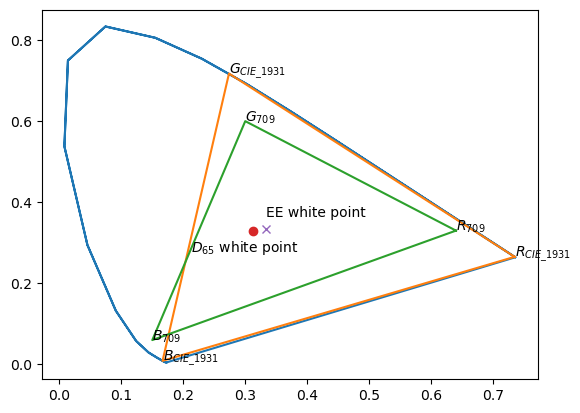

In [22]:
# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]

x = data['x']
y = data['y']
z = data['z']
illum1 = data['illum1']
illum2 = data['illum2']
X = np.zeros((1, np.size(x)))
Y = np.zeros((1, np.size(y)))

wavelength = np.arange(400, 710, 10)

for i in range(np.size(x)):
    X[0, i] = x[0, i] / (x[0, i] + y[0, i] + z[0, i])
    Y[0, i] = y[0, i] / (x[0, i] + y[0, i] + z[0, i])

CIE_1931 = np.array([[0.73467, 0.26533, 0.0],
                     [0.27376, 0.71741, 0.00883], 
                     [0.16658, 0.00886, 0.82456]])

Rec_709 = np.array([[0.640, 0.330, 0.030],
                    [0.300, 0.600, 0.100],
                    [0.150, 0.060, 0.790]])

D65_white_point = np.array([0.3127, 0.3290, 0.3583])

EE_white_point = np.array([0.3333, 0.3333, 0.3333])


plt.plot(np.append(X, X[0]).flatten(), np.append(Y, Y[0]).flatten(), '-')
plt.plot(np.append(CIE_1931[:, 0], CIE_1931[0, 0]), np.append(CIE_1931[:, 1], CIE_1931[0, 1]), '-')
plt.plot(np.append(Rec_709[:, 0], Rec_709[0, 0]), np.append(Rec_709[:, 1], Rec_709[0, 1]), '-')
plt.plot(D65_white_point[0], D65_white_point[1], 'o')
plt.plot(EE_white_point[0], EE_white_point[1], 'x')

labels_cie = [r'$R_{CIE\_1931}$', r'$G_{CIE\_1931}$', r'$B_{CIE\_1931}$']
labels_709 = [r'$R_{709}$', r'$G_{709}$', r'$B_{709}$']

for i in range(3):
    plt.text(CIE_1931[i, 0], CIE_1931[i, 1], labels_cie[i])
    plt.text(Rec_709[i, 0], Rec_709[i, 1], labels_709[i])

plt.text(D65_white_point[0]-0.1, D65_white_point[1]-0.05, r'$D_{65}$ white point')
plt.text(EE_white_point[0], EE_white_point[1]+0.03, r'EE white point')

plt.show()